In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from tueplots import bundles

from definitions import load_users_csv, load_caracteristics_csv, load_vehicles_csv


plt.rcParams.update(bundles.neurips2021(usetex=False))

data_users = load_users_csv()
data_caracteristics = load_caracteristics_csv()

#print(data_users.head())
#print(data_users[['Num_Acc', 'grav']].head())




In [2]:
severity_by_year = pd.merge(data_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

#print(severity_by_year.head())

res = severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
#print(severity_by_year[['grav', 'an']].groupby(['an']))

res['an'] = res['an'] + 2000

#print(res.dtype)
#print(res.shape)

#res_frame.pivot(index='an', columns='grav')
#print(res_frame)
#print(res_frame.shape)
res = res.pivot(index='an', columns='grav', values=0)

#print(res)
res = res.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})
res.columns.name = 'Severity'



In [3]:
import pandas as pd

print(pd.__version__)

1.4.0


In [7]:
data_vehicles = load_vehicles_csv()

data_bike_users = pd.merge(data_users[['Num_Acc', 'num_veh', 'grav']],
                          data_vehicles[['Num_Acc', 'num_veh', 'catv']],
                          how='left',
                           left_on=['Num_Acc', 'num_veh'],
                           right_on=['Num_Acc', 'num_veh'])

data_bike_users = data_bike_users.loc[data_bike_users['catv'] == 1]
print(data_bike_users.head())

bike_severity_by_year = pd.merge(data_bike_users[['Num_Acc', 'grav']],
                            data_caracteristics[['Num_Acc', 'an']],
                            how="left",
                            on=['Num_Acc', 'Num_Acc'])

bike_res = bike_severity_by_year[['grav', 'an']].groupby(['an']).value_counts().reset_index()
bike_res['an'] = bike_res['an'] + 2000
bike_res = bike_res.pivot(index='an', columns='grav', values=0)
bike_res = bike_res.rename(columns={0: 'Unscathed', 10: 'Lightly Injured', 50: 'Hospitalized', 100: 'Killed'})
bike_res.columns.name = 'Severity'

          Num_Acc num_veh  grav  catv
33   201600000015     B02    50     1
34   201600000015     C03     0     1
110  201600000052     B02    50     1
145  201600000070     B02    50     1
158  201600000076     B02    50     1


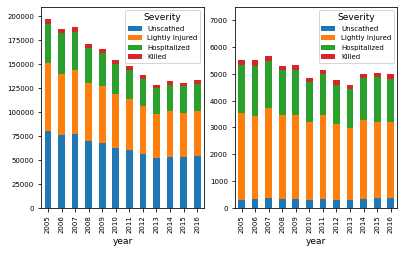

In [14]:
fig,axes = plt.subplots(nrows=1, ncols=2)

res.plot(kind='bar', stacked=True, xlabel='year', ylabel='Accident participants', ax=axes[0], ylim=[0, 210000])
bike_res.plot(kind='bar', stacked=True, xlabel='year', ax=axes[1], ylim=[0, 7500])
plt.savefig('..//Plots//Accidents_per_year_and_severity.pdf', format='pdf')
plt.show()

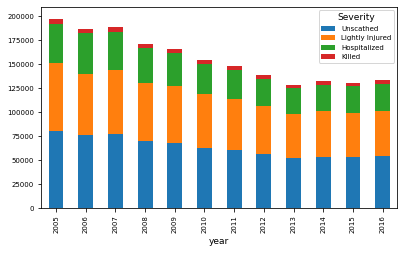

In [15]:
res.plot(kind='bar', stacked=True, xlabel='year', ylabel='Biking accident participants' ylim=[0, 210000])
plt.savefig('..//Plots//Accidents_per_year_and_severity_all.pdf', format='pdf')
plt.show()

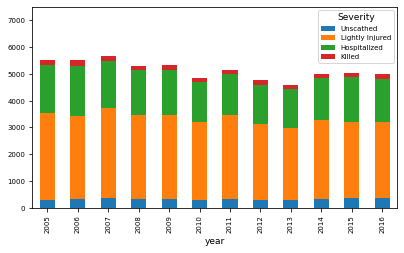

In [16]:
bike_res.plot(kind='bar', stacked=True, xlabel='year', ylim=[0, 7500])
plt.savefig('..//Plots//Accidents_per_year_and_severity_bikes.pdf', format='pdf')
plt.show()